Load `mtcars` dataset

In [1]:
import pandas as pd
import numpy as np

mtcars = pd.read_csv('mtcars.csv')

In [2]:
mtcars.shape

(32, 12)

mtcars dataset has 32 samples and 12 features

## Data cleanup

In [3]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Rename columns for interpretability

In [4]:
mtcars_ = mtcars.drop(columns=['Unnamed: 0'],inplace=False)

mtcars.rename(columns={'Unnamed: 0':'Car Model',
               'mpg':'Miles Per Gallon',
               'cyl': 'Number of Cylinders',
               'disp':'Displacement',
               'hp':'Horse Power', 
               'drat':'Rear axle ratio',
               'wt':'Weight',
               'qsec':'Quarter Mile Time',
               'vs':'Engine Type',
               'am':'Transmission',
               'gear':'Number of forward gears',
               'carb':'Number of carbureators'}, inplace=True)

Number of unique values

In [5]:
mtcars.nunique()

Car Model                  32
Miles Per Gallon           25
Number of Cylinders         3
Displacement               27
Horse Power                22
Rear axle ratio            22
Weight                     29
Quarter Mile Time          30
Engine Type                 2
Transmission                2
Number of forward gears     3
Number of carbureators      6
dtype: int64

Check for missing values

In [6]:
mtcars.isna().sum()

Car Model                  0
Miles Per Gallon           0
Number of Cylinders        0
Displacement               0
Horse Power                0
Rear axle ratio            0
Weight                     0
Quarter Mile Time          0
Engine Type                0
Transmission               0
Number of forward gears    0
Number of carbureators     0
dtype: int64

Descriptive statistics 

In [7]:
mtcars.describe()

,Miles Per Gallon,Number of Cylinders,Displacement,Horse Power,Rear axle ratio,Weight,Quarter Mile Time,Engine Type,Transmission,Number of forward gears,Number of carbureators
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Car model variable will not be necessary for further analysis

In [8]:
mtcars.drop(columns=['Car Model'], inplace=True)

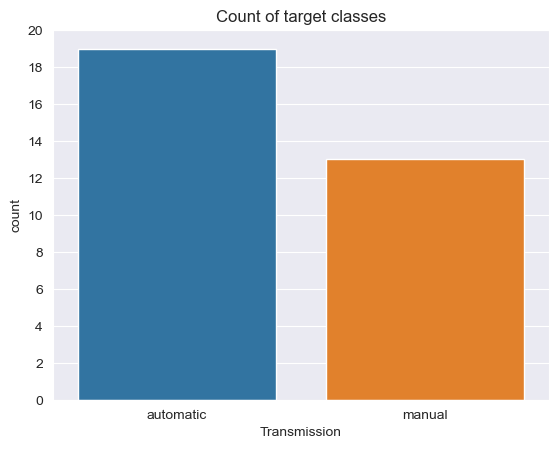

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

am_countplot = sns.countplot(data=mtcars, x='Transmission')
am_countplot.set(title='Count of target classes')
am_countplot.set_yticks(range(0,22,2))
am_countplot.set_xticklabels(['automatic','manual'])
plt.savefig('./Documents/plots/mtcars_classcounts.png')
plt.show()

In [10]:

columns = np.array(mtcars.columns)
columns = np.delete(columns, [8])

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

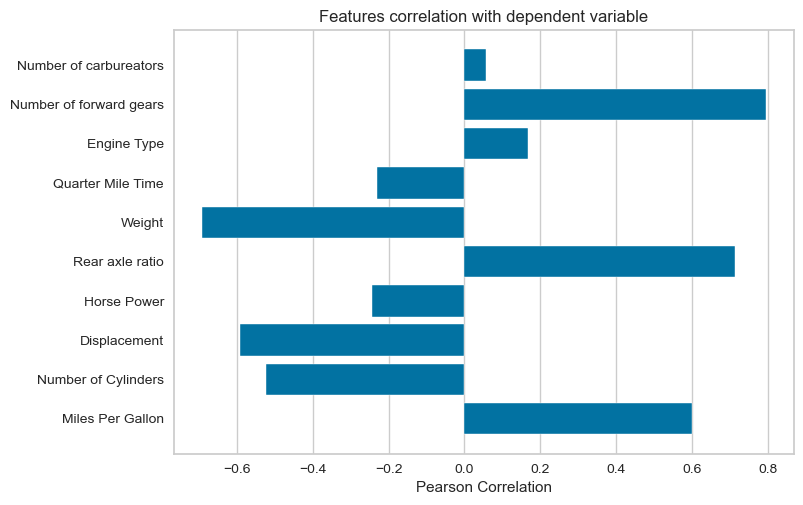

In [11]:
from yellowbrick.target import FeatureCorrelation


correlations = FeatureCorrelation(labels=np.array(columns))
correlations.fit(mtcars.drop(columns=['Transmission']), mtcars['Transmission'])
correlations.show(outpath='./Documents/plots/mtcars_targetcorrelation.png')

<Axes: xlabel='Number of forward gears', ylabel='count'>

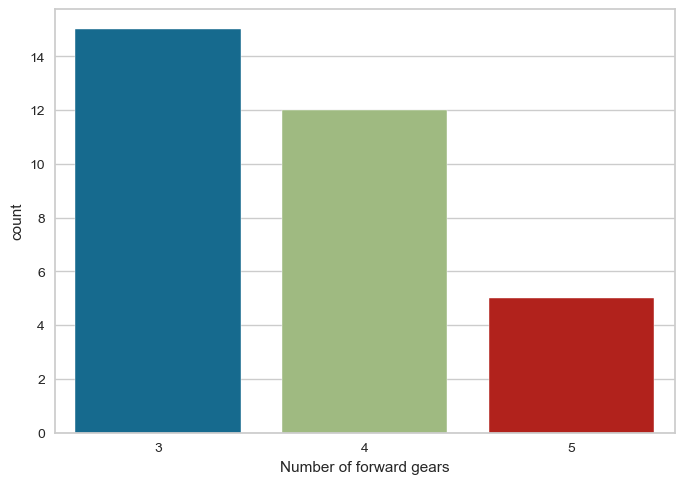

In [12]:
sns.countplot(mtcars, x='Number of forward gears')

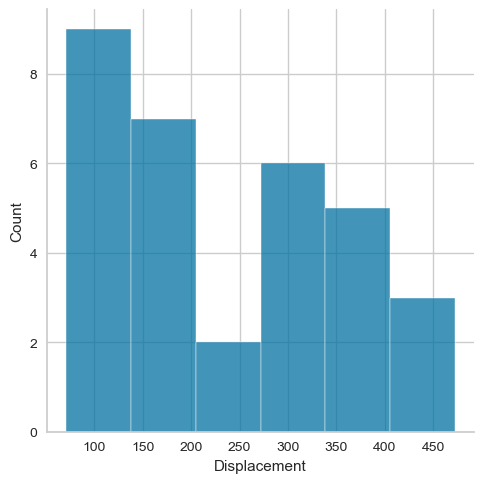

In [13]:
sns.displot(data=mtcars,x='Displacement')

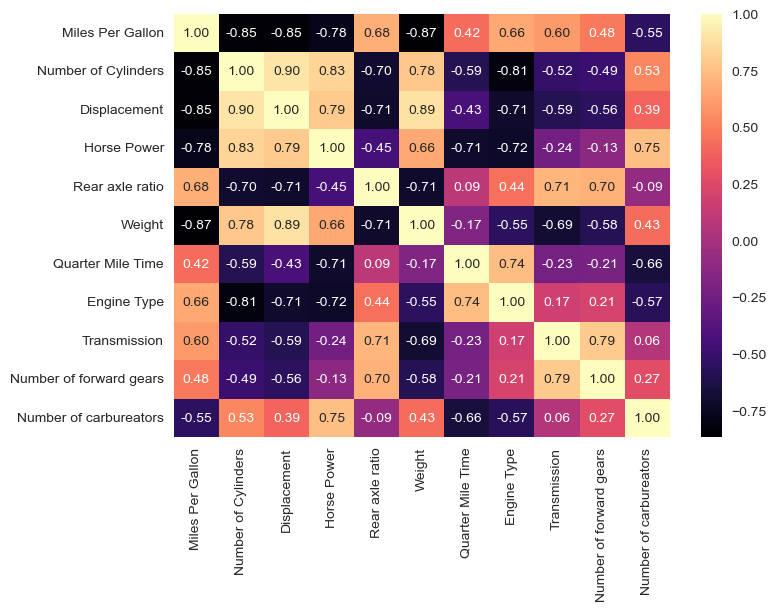

In [14]:
sns.heatmap(mtcars.corr(),cmap='magma', fmt='.2f', annot=True, annot_kws={'fontsize':'small'})
plt.savefig('./Documents/plots/mtcars_corrplot.png')
plt.show()

In [15]:
mtcars.replace({'Transmission': {0:'Automatic', 1:'Manual'},'Engine Type': {0:'V-shaped',1:'Straight'}}, inplace=True)


<Axes: xlabel='Weight', ylabel='Miles Per Gallon'>

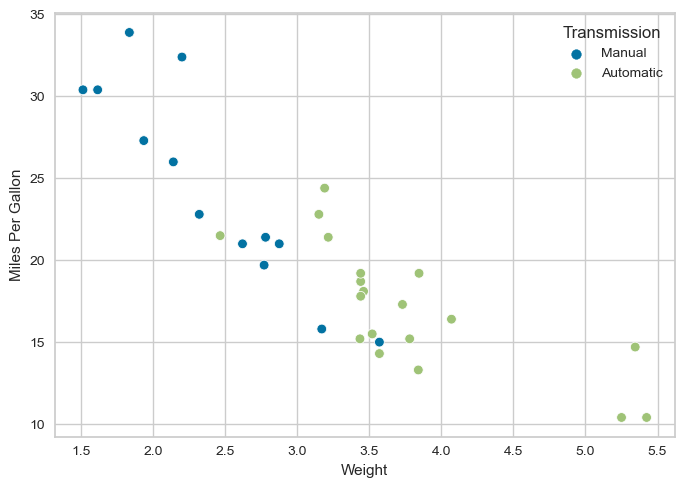

In [16]:
sns.scatterplot(data=mtcars, x='Weight', y='Miles Per Gallon' ,hue='Transmission')

<Axes: xlabel='Weight', ylabel='Miles Per Gallon'>

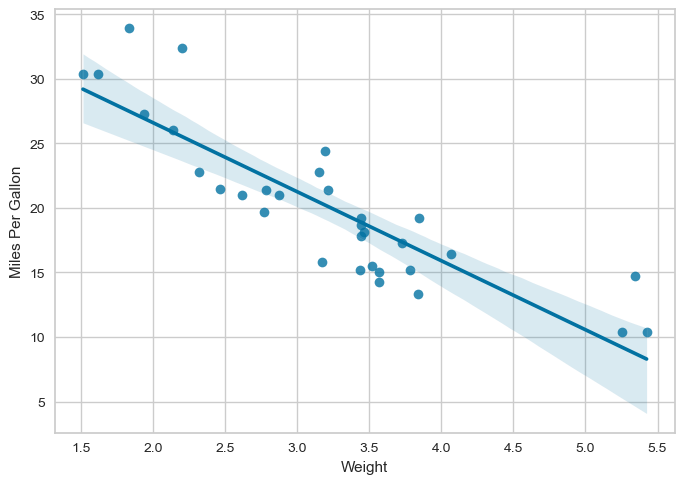

In [17]:
sns.regplot(data=mtcars, x='Weight', y='Miles Per Gallon' )

<Axes: xlabel='Displacement', ylabel='Weight'>

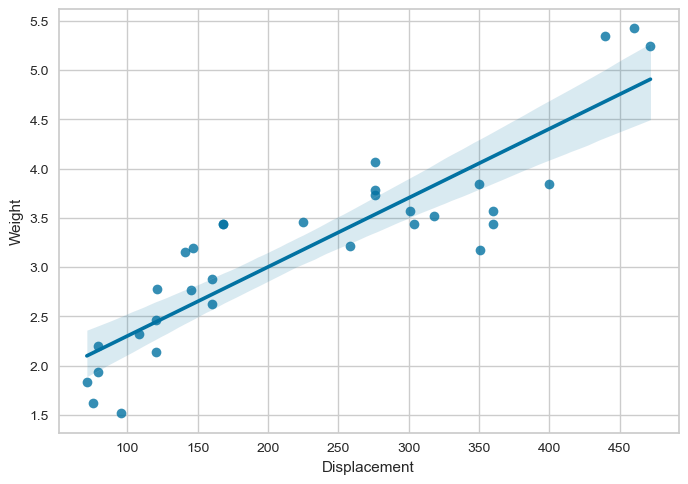

In [18]:
sns.regplot(data=mtcars, x='Displacement', y='Weight')

<Axes: xlabel='Displacement', ylabel='Number of Cylinders'>

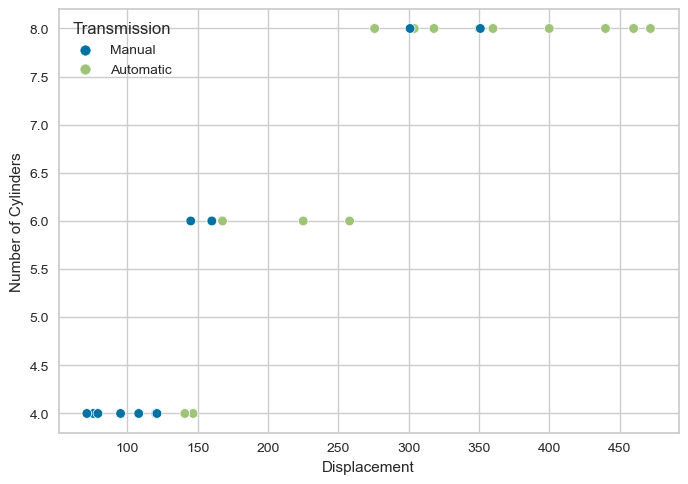

In [19]:
sns.scatterplot(data=mtcars, x='Displacement', y='Number of Cylinders' ,hue='Transmission')

In [26]:
X = mtcars_.drop(columns=['am'])
y = mtcars['Transmission'].values.reshape(-1,1)

In [27]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:

tSNE = TSNE(n_components=2, random_state=100)
mtcars_reduced = tSNE.fit_transform(X)

In [37]:
mtcars_reduced = np.c_[mtcars_reduced,y]

In [38]:
mtcars_reduced = pd.DataFrame(mtcars_reduced, columns=['x','y','Transmission'])

<Axes: xlabel='x', ylabel='y'>

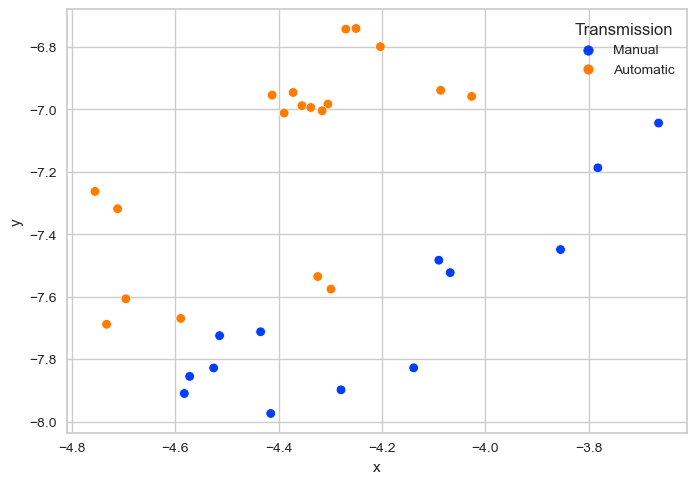

In [39]:
sns.scatterplot(data=mtcars_reduced,x='x',y='y', hue='Transmission', palette='bright')